In [276]:
import math

import numpy as np
import matplotlib.pyplot as plt


In [309]:




class Config:
    def __init__(self):
        self.alpha = np.float32(1)
        self.gamma = np.float32(2)
        self.rho = np.float32(0.5)
        self.sigma = np.float32(0.5)
        self.dims = 2


config = Config()
X = 5
Y = 5
"""
X2 = 8
Y2 = 8
"""


class Point:
    def __init__(self, x: np.int32, y: np.int32):
        self.x = x
        self.y = y

    def f(self):
        return np.sqrt(np.power(X - self.x, 2) + np.power(Y - self.y, 2))
        """
        return min(np.sqrt(np.power(X - self.x, 2) + np.power(Y - self.y, 2)),
                      np.sqrt(np.power(X2 - self.x, 2) + np.power(Y2 - self.y, 2)))
        """

    def __repr__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"

    def __lt__(self, other):
        return self.f() < other.f()


def plus(a, b):
    ret1 = a.x + b.x
    ret2 = a.y + b.y
    return Point(ret1, ret2)


def minus(a, b):
    ret1 = a.x - b.x
    ret2 = a.y - b.y
    return Point(ret1, ret2)


def expand(k, a):
    ret1 = a.x * k
    ret2 = a.y * k
    return Point(ret1, ret2)


def divide(a, k):
    ret1 = a.x / k
    ret2 = a.y / k
    return Point(ret1, ret2)


class DownhillSimplexMethod:

    def __init__(self, config, dims=2):
        self.alpha = config.alpha
        self.gamma = config.gamma
        self.rho = config.rho
        self.sigma = config.sigma
        self.dims = dims
        self.points = []
        for i in range(self.dims + 1):
            self.points.append(Point(np.random.uniform(0, 10, 1)[0], np.random.uniform(0, 10, 1)[0]))
        self.initialize()

    def initialize(self):
        self.x_o = Point(np.float32(0), np.float32(0))
        self.x_r = Point(np.float32(0), np.float32(0))
        self.x_e = Point(np.float32(0), np.float32(0))
        self.x_c = Point(np.float32(0), np.float32(0))
        self.x_n = self.points[-2]
        self.x_n1 = self.points[-1]

    def replace(self, p: Point):
        self.points[-1] = p

    def order(self):
        self.points.sort()

    def calculate(self):
        for i in range(self.dims):
            self.x_o = plus(self.x_o, self.points[i])
        self.x_o = divide(self.x_o, self.dims)

    def reflection(self):
        self.x_r = plus(self.x_o, expand(self.alpha, minus(self.x_o, self.x_n1)))
        if self.points[0].f() <= self.x_r.f() < self.x_n.f():
            self.replace(self.x_r)
            return True
        return False

    def expansion(self):
        if self.x_r.f() < self.points[0].f():
            self.x_e = plus(self.x_o, expand(self.gamma, minus(self.x_r, self.x_o)))
            if self.x_e.f() < self.x_r.f():
                self.replace(self.x_e)
            else:
                self.replace(self.x_r)
            return True
        return False


    def contraction(self):
        if self.x_r.f() < self.x_n.f():
            return True

        if self.x_r.f() < self.x_n1.f():
            self.x_c = plus(self.x_o, expand(self.rho, minus(self.x_r, self.x_o)))
            if self.x_c.f() < self.x_r.f():
                self.replace(self.x_c)
                return True
            else:
                return False
        else:
            self.x_c = plus(self.x_o, expand(self.rho, minus(self.x_n1, self.x_o)))
            if self.x_c.f() < self.x_n1.f():
                self.replace(self.x_c)
                return True
            return False


    def shrink(self):
        for i in range(1, len(self.points)):
            self.points[i] = plus(self.points[0], expand(self.sigma, minus(self.points[i], self.points[0])))






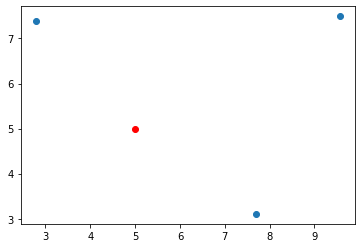

[(7.699061005310458, 3.106372762622236), (9.574181093593568, 7.493035751738045), (2.7844015549771695, 7.386050510910449)]


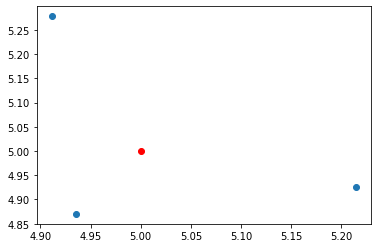

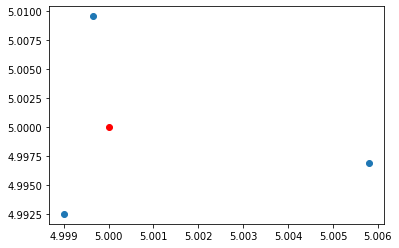

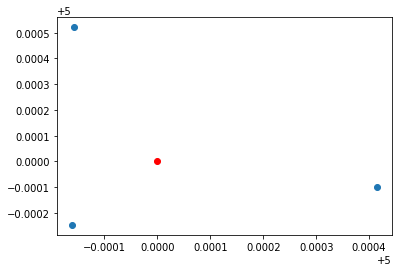

In [313]:


dsm = DownhillSimplexMethod(config)


def make_graph(vectors):
    x = []
    y = []
    for vector in vectors:
        x.append(vector.x)
        y.append(vector.y)
    plt.scatter(x, y)
    plt.scatter(X, Y, color='r')
    #plt.scatter(X2, Y2, color='r')
    plt.show()


def make_f_graph(vectors):
    cnt = []
    res = []
    for i, vector in enumerate(vectors):
        cnt.append(i)
        res.append(vector.f())
    plt.scatter(cnt, res)
    plt.show()


result = []
make_graph(dsm.points)
print(dsm.points)
for i in range(30):
    dsm.order()
    dsm.initialize()
    if (i+1)%10 == 0:
        make_graph(dsm.points)
    dsm.calculate()
    fin = dsm.reflection()
    if fin:
        result.append(dsm.points[0])
        continue
    fin = dsm.expansion()
    if fin:
        result.append(dsm.points[0])
        continue
    fin = dsm.contraction()

    if fin:
        result.append(dsm.points[0])
        continue
    dsm.shrink()
    result.append(dsm.points[0])


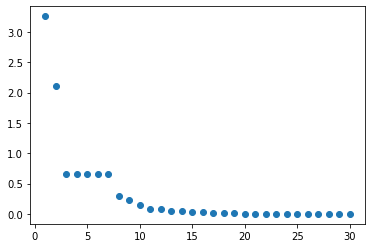

In [315]:
def make_f_graph(vectors):
    cnt = []
    res = []
    for i, vector in enumerate(vectors):
        cnt.append(i+1)
        res.append(vector.f())
    plt.scatter(cnt, res)
    plt.show()
make_f_graph(result)

In [316]:
print(result[-1].x, result[-1].y)

4.999839495925646 4.9997537422554075


3.1622776601683795